In case of non-linearly separable data, the simple SVM algorithm cannot be used. Rather, a modified version of SVM, called Kernel SVM, is used.
Basically, the kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions.

In [1]:
from sklearn import datasets
iris=datasets.load_iris()


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
import pandas as pd
data=pd.DataFrame({'sepal length':iris.data[:,0],
                  'sepal width':iris.data[:,1],
                   'petal length':iris.data[:,2],
                  'petal width' :iris.data[:,3],
                  'species':iris.target,
                  })

In [8]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
x=data.drop('species',axis=1)
y=data['species']

Train & Test:

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

### EDA

In [16]:
a=data.corr()

AxesSubplot(0.125,0.125;0.62x0.755)


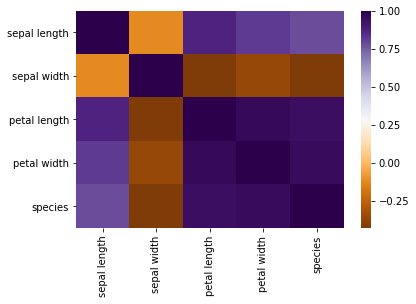

In [23]:
import seaborn as sns
print(sns.heatmap(a,cmap='PuOr'))

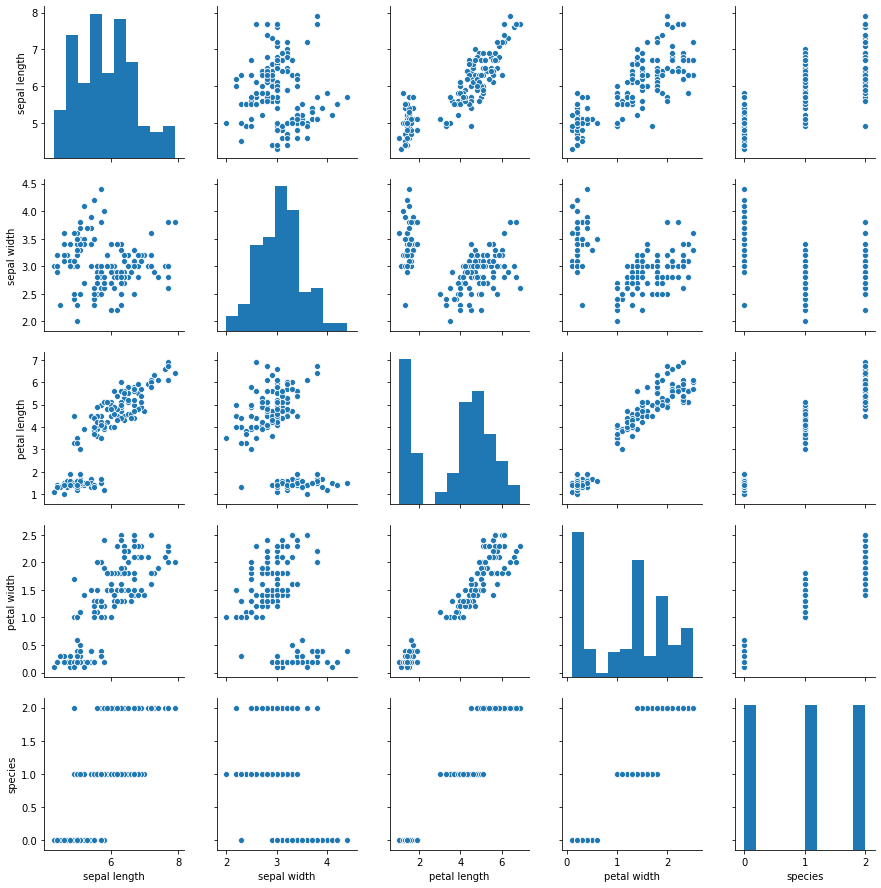

In [26]:
sns.pairplot(data)

by seeing the above graph we can eaisly say that in SVM linear kernel will not work we have to go for other kernel systems

Training the Algorithm:

To train the kernel SVM, we use the same SVC class of the Scikit-Learn's svm library. The difference lies in the value for the kernel parameter of the SVC class. In the case of the simple SVM we used "linear" as the value for the kernel parameter. However, for kernel SVM you can use Gaussian, polynomial, sigmoid kernel. We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

# 1. Polynomial Kernel:
In the case of polynomial kernel, you also have to pass a value for the degree parameter of the SVC class. This basically is the degree of the polynomial. 

In [27]:
from sklearn.svm import SVC
svc=SVC(kernel="poly",degree=8)
svc.fit(x_train,y_train)

C:\Users\Pawas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred=svc.predict(x_test)

Model Evaluation:

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


# 2. Gaussian Kernel:

To use Gaussian kernel, you have to specify 'rbf' as value for the Kernel parameter of the SVC class.

In [31]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

C:\Users\Pawas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred=svc.predict(x_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


# 3. Sigmoid Kernel:

To use the sigmoid kernel, you have to specify 'sigmoid' as value for the kernel parameter of the SVC class.

In [34]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)

C:\Users\Pawas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred=svc.predict(x_test)

In [36]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 0  0 10]
 [ 0  0 12]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        12
           2       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30

0.26666666666666666


C:\Users\Pawas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Comparison of Kernel Performance:
If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.
Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.